In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [2]:
start_date = "2010-01-01"
end_date = datetime.datetime.now().strftime("%Y-%m-%d")

In [3]:
end_date

'2023-04-10'

In [4]:
yf.pdr_override()

df = yf.download("GOOG", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()
df.shape

(3338, 6)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3.338000e+03
mean,49.921776,50.437809,49.422380,49.940935,49.940935,5.730784e+07
std,36.429725,36.865039,36.022215,36.446624,36.446624,5.029989e+07
min,10.916831,11.015710,10.800268,10.861040,10.861040,1.584340e+05
25%,20.729364,20.856575,20.643436,20.717098,20.717098,2.599758e+07
50%,38.360750,38.581251,37.986502,38.335501,38.335501,3.685700e+07
75%,63.549999,64.079876,62.832950,63.572125,63.572125,7.766205e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,5.952147e+08


In [7]:
df = df[['Close']]

In [8]:
df.head(4)

,Close
Date,
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037


In [9]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)

C:\Users\chinm\AppData\Local\Temp\ipykernel_6100\3844823444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


In [10]:
# df = df.reset_index()

In [11]:
# df = df.drop['Date'].copy()
# df = df.drop(['Date'], axis=1)

In [12]:
df

,Close,Prediction
Date,,
2010-01-04,15.610239,13.360920
2010-01-05,15.541497,13.311356
2010-01-06,15.149715,13.359924
2010-01-07,14.797037,13.278230
2010-01-08,14.994298,13.481966
...,...,...
2023-03-31,104.000000,NaN
2023-04-03,104.910004,NaN
2023-04-04,105.120003,NaN


In [13]:
X = np.array(df.drop(['Prediction'],1))

C:\Users\chinm\AppData\Local\Temp\ipykernel_6100\2158571685.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))


In [14]:
X = X

In [15]:
print(X.shape)
X = X[:-future_days]

(3338, 1)


In [16]:
X.shape

(3313, 1)

In [17]:
y = np.array(df['Prediction'])[:-future_days]

In [18]:
y.shape

(3313,)

In [19]:
X

array([[15.61023903],
       [15.54149723],
       [15.14971542],
       ...,
       [90.30000305],
       [90.51000214],
       [92.30999756]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [21]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [22]:
lr = LinearRegression().fit(x_train, y_train)

In [23]:
#get the last 'x' rows of feature dataset 
x_feature = X[:-future_days]

In [24]:
x_feature = x_feature[-25:]
x_feature

array([[ 89.15000153],
       [ 89.62999725],
       [ 90.25      ],
       [ 88.26000214],
       [ 89.80999756],
       [ 87.93000031],
       [ 86.45999908],
       [ 88.94999695],
       [ 88.73000336],
       [ 89.69999695],
       [ 88.70999908],
       [ 86.76999664],
       [ 88.16000366],
       [ 88.80000305],
       [ 89.23999786],
       [ 92.26000214],
       [ 91.91000366],
       [ 92.80000305],
       [ 92.16000366],
       [ 91.77999878],
       [ 93.91000366],
       [ 99.27999878],
       [101.20999908],
       [ 99.20999908],
       [ 96.73000336]])

In [25]:
tree_prediction = tree.predict(x_feature)
print(tree_prediction.shape)
print()

lr_prediction = lr.predict(x_feature)
print(lr_prediction.shape)
print()

(25,)

(25,)



In [26]:
predictions = tree_prediction

In [27]:
valid = df[X.shape[0]:]

In [28]:
valid

,Close,Prediction
Date,,
2023-03-03,94.019997,NaN
2023-03-06,95.580002,NaN
2023-03-07,94.169998,NaN
2023-03-08,94.650002,NaN
2023-03-09,92.660004,NaN
2023-03-10,91.010002,NaN
2023-03-13,91.660004,NaN
2023-03-14,94.250000,NaN
2023-03-15,96.550003,NaN


In [29]:
valid["Prediction"] = predictions

C:\Users\chinm\AppData\Local\Temp\ipykernel_6100\898096224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"] = predictions


In [30]:
valid

,Close,Prediction
Date,,
2023-03-03,94.019997,99.160004
2023-03-06,95.580002,100.709999
2023-03-07,94.169998,89.362503
2023-03-08,94.650002,99.870003
2023-03-09,92.660004,89.362503
2023-03-10,91.010002,108.800003
2023-03-13,91.660004,105.220001
2023-03-14,94.250000,103.470001
2023-03-15,96.550003,108.040001


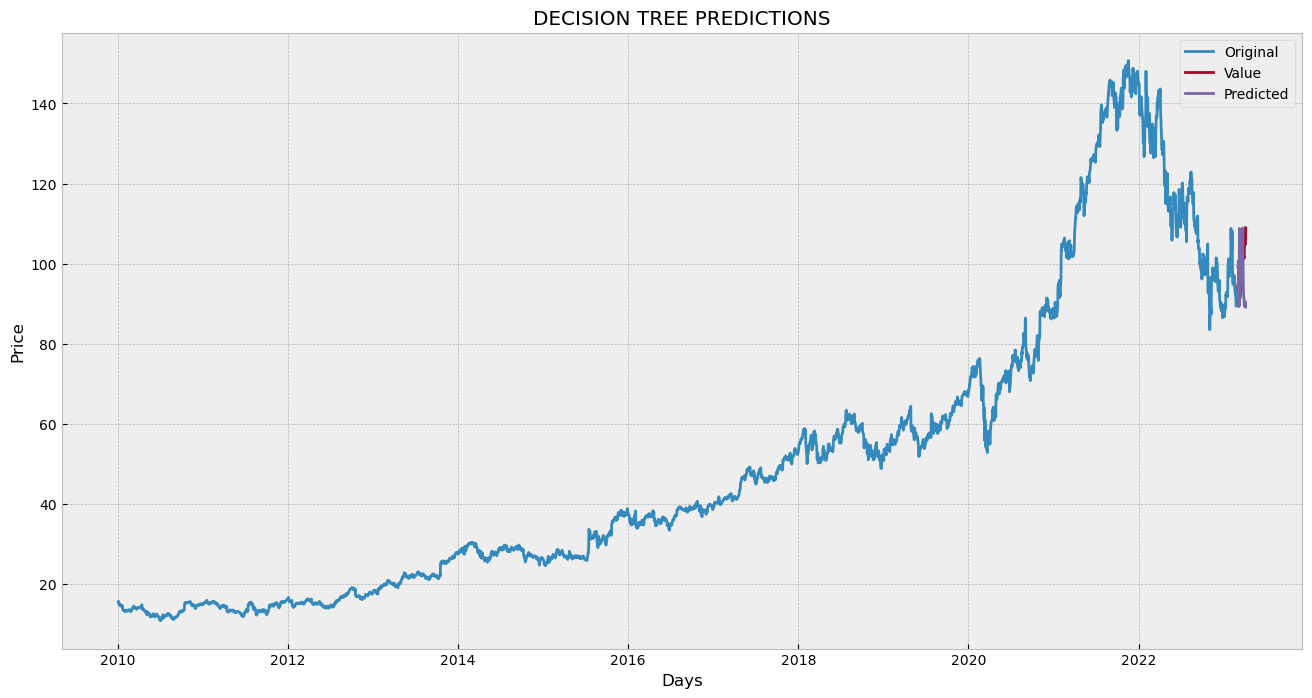

In [31]:
plt.figure(figsize=(16,8))
plt.title("DECISION TREE PREDICTIONS")
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Value','Predicted'])
plt.show()

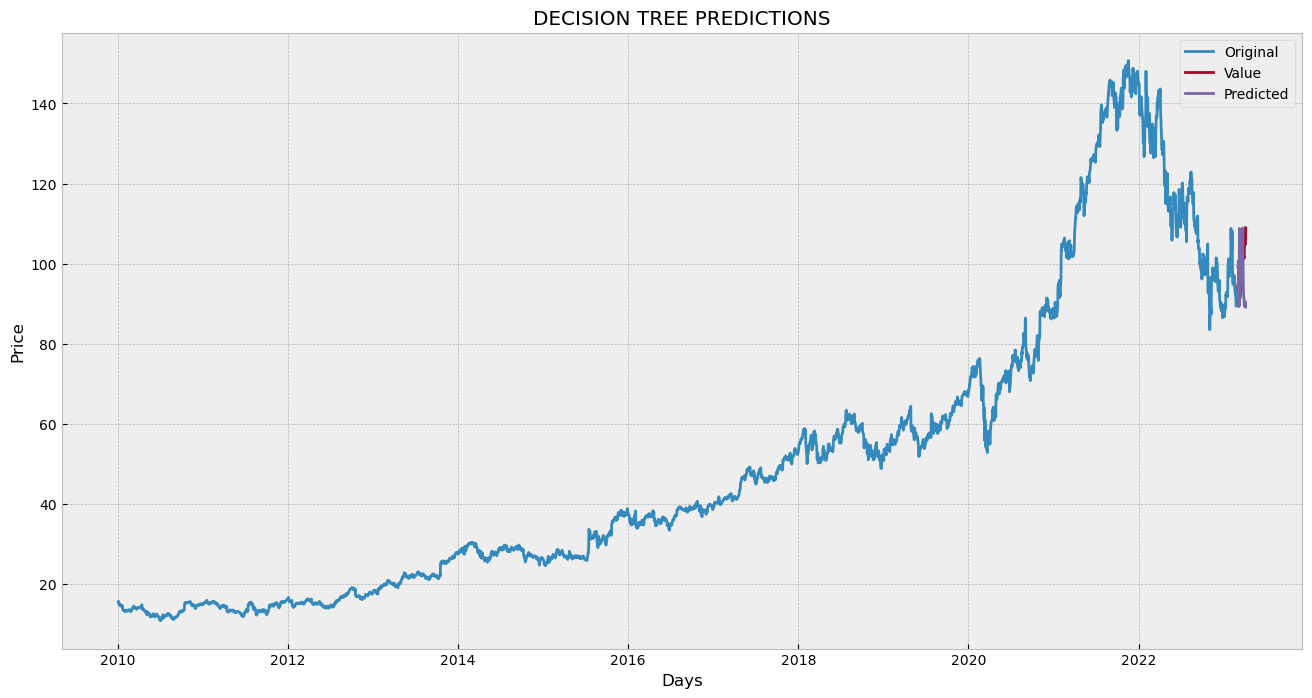

In [32]:
plt.figure(figsize=(16,8))
plt.title("DECISION TREE PREDICTIONS")
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Value','Predicted'])
plt.show()

In [33]:
# df[-50:]

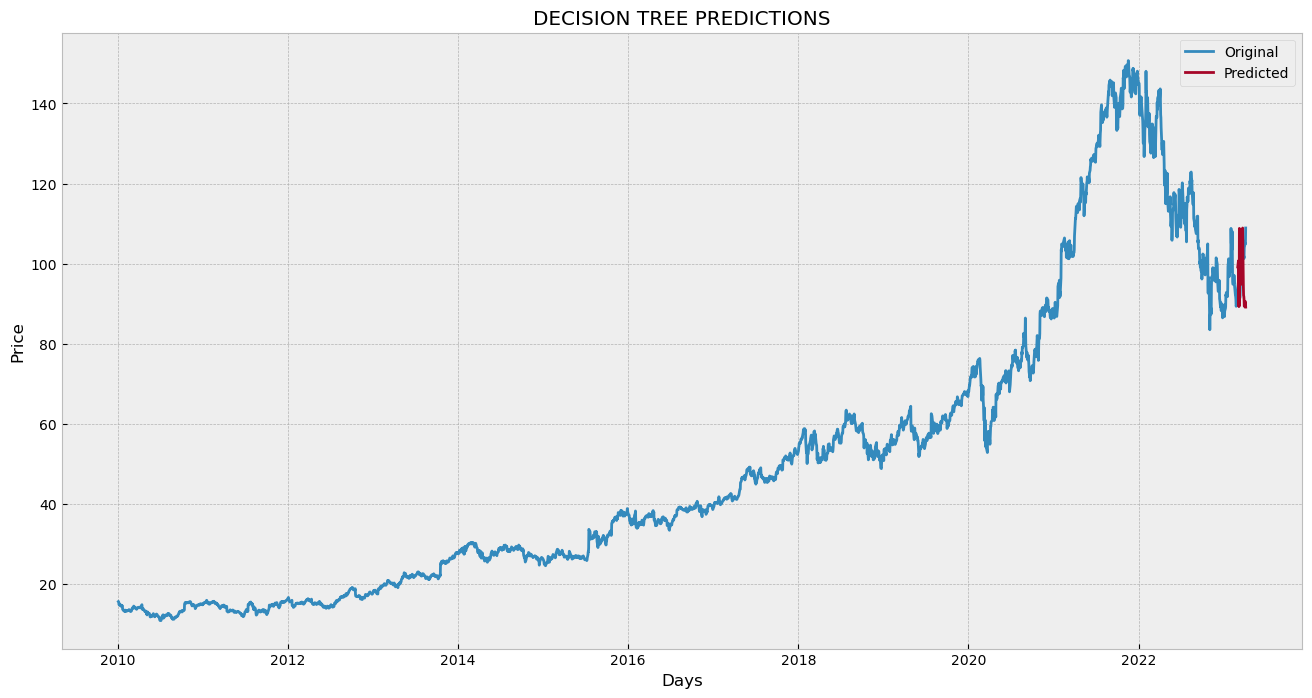

In [34]:
plt.figure(figsize=(16,8))
plt.title("DECISION TREE PREDICTIONS")
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot(df['Close'])
plt.plot(valid[['Prediction']])
plt.legend(['Original','Predicted'])
plt.show()